# **Install and import data**

In [25]:
! pip install -q kaggle

In [26]:
!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten -p "D:\Working\AiProj\Dataset"

^C


Dataset URL: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
License(s): CC0-1.0




  0%|          | 0.00/4.77G [00:00<?, ?B/s]
  0%|          | 1.00M/4.77G [00:01<1:36:53, 880kB/s]
  0%|          | 2.00M/4.77G [00:01<47:58, 1.78MB/s] 
  0%|          | 3.00M/4.77G [00:01<29:51, 2.86MB/s]
  0%|          | 5.00M/4.77G [00:01<15:45, 5.41MB/s]
  0%|          | 8.00M/4.77G [00:01<09:07, 9.34MB/s]
  0%|          | 11.0M/4.77G [00:01<06:37, 12.8MB/s]
  0%|          | 14.0M/4.77G [00:01<05:26, 15.7MB/s]
  0%|          | 17.0M/4.77G [00:02<04:51, 17.5MB/s]
  0%|          | 19.0M/4.77G [00:02<07:42, 11.0MB/s]
  0%|          | 22.0M/4.77G [00:02<06:13, 13.6MB/s]
  1%|          | 25.0M/4.77G [00:03<07:55, 10.7MB/s]
  1%|          | 27.0M/4.77G [00:03<07:28, 11.3MB/s]
  1%|          | 29.0M/4.77G [00:03<07:17, 11.6MB/s]
  1%|          | 33.0M/4.77G [00:03<05:37, 15.1MB/s]
  1%|          | 36.0M/4.77G [00:03<05:09, 16.4MB/s]
  1%|          | 40.0M/4.77G [00:03<04:29, 18.8MB/s]
  1%|          | 44.0M/4.77G [00:04<04:15, 19.9MB/s]
  1%|          | 48.0M/4.77G [00:04<04:03, 20.8MB/s]

In [22]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
print("GPUs available:", gpus)

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
import zipfile

with zipfile.ZipFile('D:\Working\AiProj\Dataset\\fruit-and-vegetable-disease-healthy-vs-rotten.zip', 'r') as zip_ref:
    zip_ref.extractall('D:\Working\AiProj\Dataset\\')

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
C:\Users\zanen\AppData\Local\Temp\ipykernel_16588\1163722313.py:3: SyntaxWarning: invalid escape sequence '\W'
  with zipfile.ZipFile('D:\Working\AiProj\Dataset\\fruit-and-vegetable-disease-healthy-vs-rotten.zip', 'r') as zip_ref:
C:\Users\zanen\AppData\Local\Temp\ipykernel_16588\1163722313.py:4: SyntaxWarning: invalid escape sequence '\W'
  zip_ref.extractall('D:\Working\AiProj\Dataset\\')


# Visualizing data**prosessing**

In [2]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img

def visualize_sample_images(dataset_dir, categories):
    n = len(categories)
    fig, axs = plt.subplots(1, n, figsize=(20, 5))

    for i, category in enumerate(categories):
        folder = os.path.join(dataset_dir, category)
        image_file = random.choice(os.listdir(folder))  # Pick a random image from the folder
        img_path = os.path.join(folder, image_file)
        img = mpimg.imread(img_path)  # Load the image
        axs[i].imshow(img)
        axs[i].set_title(category)
        axs[i].axis('off')  # Remove axis for better visualization

    plt.tight_layout()
    plt.show()

In [3]:
# Step 1: Define paths
base_dir = 'D:\Working\AiProj\Dataset\\Fruit And Vegetable Diseases Dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [7]:
# Step 2: Create 'train' and 'test' directories with 'Rotten' and 'Healthy' inside them
for dir_type in ['train', 'test']:
    for category in ['Rotten', 'Healthy']:
        os.makedirs(os.path.join(base_dir, dir_type, category), exist_ok=True)

# Step 3: Function to categorize folders based on '__'
def categorize_folders(base_dir):
    rotten_categories = []
    healthy_categories = []

    for folder in os.listdir(base_dir):
        if '__' in folder:
            category = folder.split('__')[1]  # Get the part after '__'
            if category == 'Rotten':
                rotten_categories.append(folder)
            elif category == 'Healthy':
                healthy_categories.append(folder)

    return rotten_categories, healthy_categories

# Categorize the folders
rotten_categories, healthy_categories = categorize_folders(base_dir)

# Step 4: Function to move files into Rotten and Healthy for training and testing
def split_and_move(category_list, label, base_dir, train_dir, test_dir):
    for category in category_list:
        category_path = os.path.join(base_dir, category)
        if os.path.exists(category_path):
            files = os.listdir(category_path)
            train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

            # Move to train/label
            for file in train_files:
                shutil.move(os.path.join(category_path, file), os.path.join(train_dir, label, file))

            # Move to test/label
            for file in test_files:
                shutil.move(os.path.join(category_path, file), os.path.join(test_dir, label, file))

# Step 5: Split and move for Rotten and Healthy categories
split_and_move(rotten_categories, 'Rotten', base_dir, train_dir, test_dir)
split_and_move(healthy_categories, 'Healthy', base_dir, train_dir, test_dir)

print("Data has been moved into train and test sets with 'Rotten' and 'Healthy' categories.")


Data has been moved into train and test sets with 'Rotten' and 'Healthy' categories.


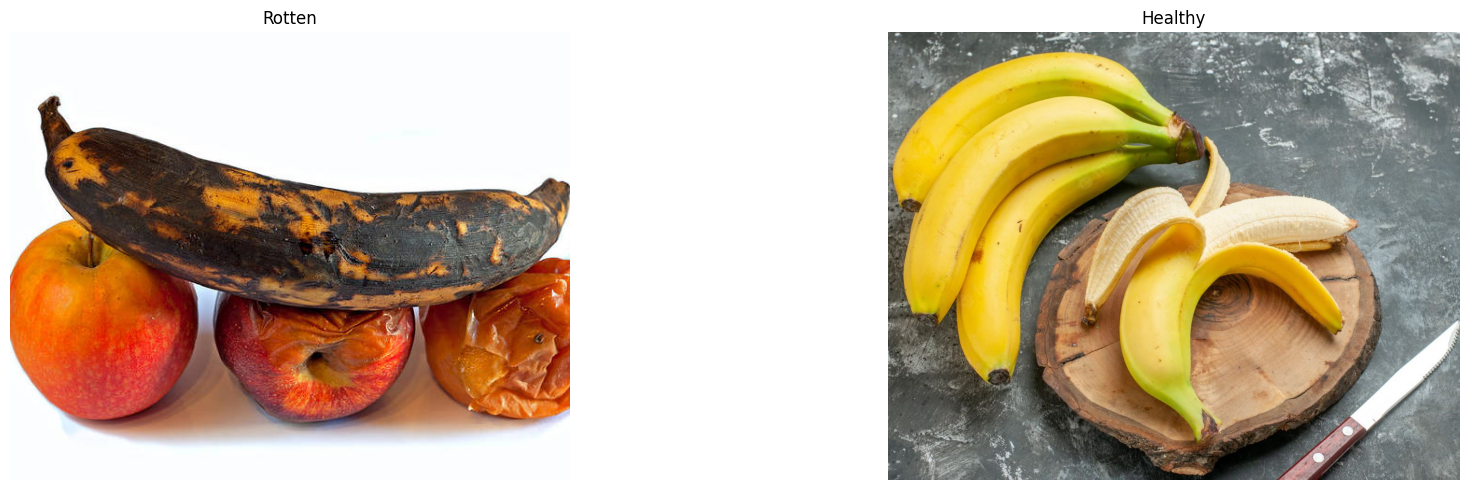

In [14]:
categories = ['Rotten', 'Healthy']  # Add more categories as needed
visualize_sample_images(test_dir, categories)

<>:11: SyntaxWarning: invalid escape sequence '\W'
<>:12: SyntaxWarning: invalid escape sequence '\W'
<>:11: SyntaxWarning: invalid escape sequence '\W'
<>:12: SyntaxWarning: invalid escape sequence '\W'
C:\Users\zanen\AppData\Local\Temp\ipykernel_16588\3363540149.py:11: SyntaxWarning: invalid escape sequence '\W'
  train_counts = count_data('D:\Working\AiProj\Dataset\\Fruit And Vegetable Diseases Dataset\\train')
C:\Users\zanen\AppData\Local\Temp\ipykernel_16588\3363540149.py:12: SyntaxWarning: invalid escape sequence '\W'
  test_counts = count_data('D:\Working\AiProj\Dataset\\Fruit And Vegetable Diseases Dataset\\test')


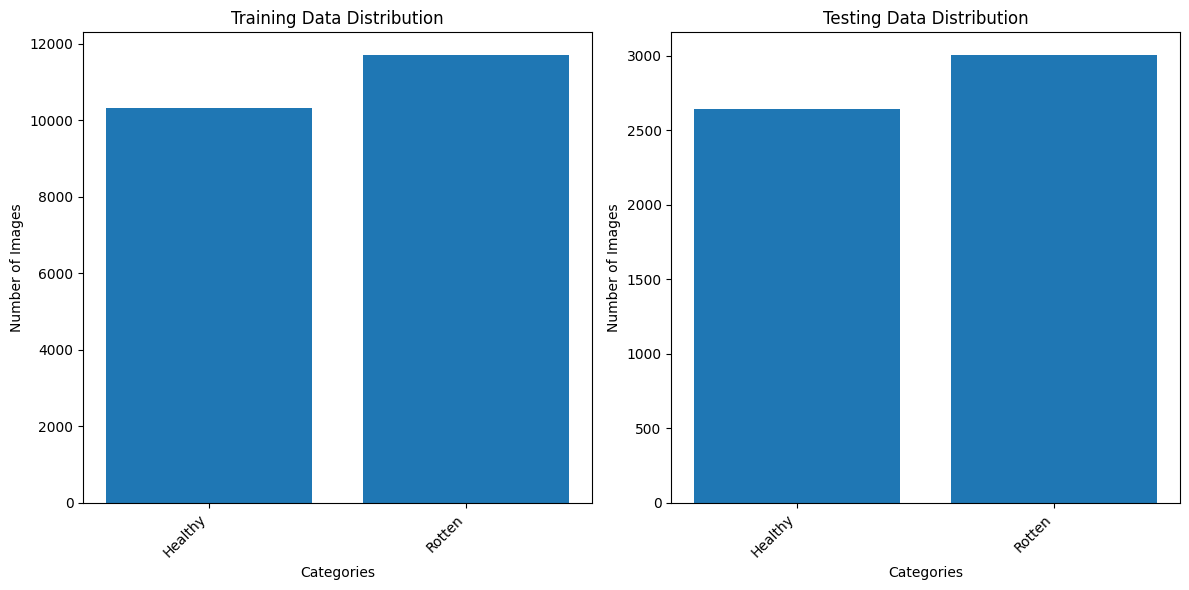

In [13]:
def count_data(directory):
    counts = {}
    for dir_name in os.listdir(directory):
        dir_path = os.path.join(directory, dir_name)
        if os.path.isdir(dir_path):
            counts[dir_name] = len(os.listdir(dir_path))
    return counts

train_counts = count_data('D:\Working\AiProj\Dataset\\Fruit And Vegetable Diseases Dataset\\train')
test_counts = count_data('D:\Working\AiProj\Dataset\\Fruit And Vegetable Diseases Dataset\\test')

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(train_counts.keys(), train_counts.values())
plt.title('Training Data Distribution')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(test_counts.keys(), test_counts.values())
plt.title('Testing Data Distribution')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# **Data Prosessing**

In [6]:
train_class = len(os.listdir(train_dir))
print("train shape",train_class)
test_class = len(os.listdir(test_dir))
print("test shape",test_class)

train shape 2
test shape 2


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Using 20% of the data for validation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

Found 17623 images belonging to 2 classes.
Found 4404 images belonging to 2 classes.
Found 5650 images belonging to 2 classes.


In [18]:
print("Training samples:", train_generator.samples)
print("Validation samples:", validation_generator.samples)
print("Training samples:", test_generator.samples)

Training samples: 17623
Validation samples: 4404
Training samples: 5650


In [5]:
class_indices = train_generator.class_indices
print(class_indices)


{'Healthy': 0, 'Rotten': 1}


# **Model Training**

In [41]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [10]:
from tensorflow.keras import layers, models

with strategy.scope():
# Define the model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

        # Compile the model
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    # Print the model summary
model.summary()

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                        

In [12]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Adjust based on your dataset
)

Epoch 1/10
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
402/551 [====================>.........] - ETA: 58s - loss: 0.6125 - accuracy: 0.6645

d:\Anaconda\envs\ML\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


551/551 [==============================] - 323s 581ms/step - loss: 0.5986 - accuracy: 0.6759 - val_loss: 0.6883 - val_accuracy: 0.6417
Epoch 2/10
551/551 [==============================] - 299s 543ms/step - loss: 0.4866 - accuracy: 0.7564 - val_loss: 0.6137 - val_accuracy: 0.6617
Epoch 3/10
551/551 [==============================] - 304s 551ms/step - loss: 0.4099 - accuracy: 0.8102 - val_loss: 0.5268 - val_accuracy: 0.7041
Epoch 4/10
551/551 [==============================] - 302s 549ms/step - loss: 0.3524 - accuracy: 0.8457 - val_loss: 0.4950 - val_accuracy: 0.7436
Epoch 5/10
551/551 [==============================] - 299s 543ms/step - loss: 0.3196 - accuracy: 0.8616 - val_loss: 0.5002 - val_accuracy: 0.7425
Epoch 6/10
551/551 [==============================] - 304s 552ms/step - loss: 0.2970 - accuracy: 0.8750 - val_loss: 0.4697 - val_accuracy: 0.7698
Epoch 7/10
551/551 [==============================] - 305s 553ms/step - loss: 0.2710 - accuracy: 0.8862 - val_loss: 0.4715 - val_accura

In [13]:
model.save('D:\Working\AiProj\\fooddetect_v1.h5')

In [26]:
model = tf.keras.models.load_model('D:\Working\AiProj\\fooddetect_v1.h5')

In [15]:
# Plot training & validation accuracy values
def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

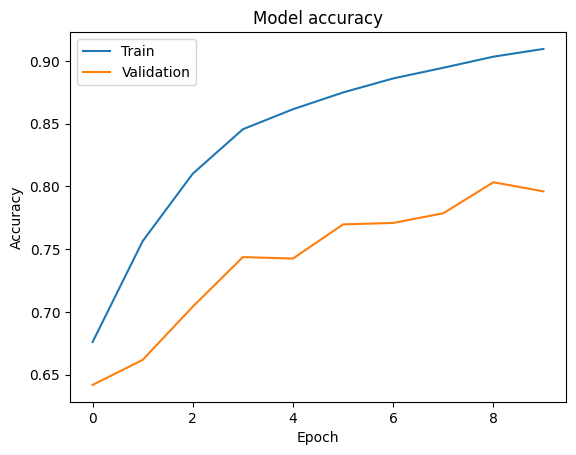

In [18]:
plot_accuracy(history)

In [27]:
eval_result = model.evaluate(test_generator)
print(f"Training Loss: {eval_result[0]}, Training Accuracy: {eval_result[1]}")

177/177 [==============================] - 34s 192ms/step - loss: 0.2375 - accuracy: 0.9050
Training Loss: 0.23745103180408478, Training Accuracy: 0.9049557447433472


In [28]:
class_indices = train_generator.class_indices
print(class_indices)

{'Healthy': 0, 'Rotten': 1}


In [15]:
import numpy as np
from sklearn.metrics import classification_report

def evaluate(model, class_indices, validation_generator):
    # Get the ground truth labels (already in numeric form)
    true_labels = validation_generator.classes

    # Predict probabilities for the validation data
    predictions_prob = model.predict(validation_generator)

    # Convert predicted probabilities to binary class labels
    predictions = (predictions_prob >= 0.5).astype(int)


    # Get class names from the class_indices
    class_names = list(class_indices.keys())

    # Calculate and print classification report
    report = classification_report(true_labels, predictions, target_names=class_names)
    print(report)


In [29]:
evaluate(model,class_indices,test_generator)

177/177 [==============================] - 34s 191ms/step
              precision    recall  f1-score   support

     Healthy       0.93      0.86      0.89      2645
      Rotten       0.88      0.95      0.91      3005

    accuracy                           0.90      5650
   macro avg       0.91      0.90      0.90      5650
weighted avg       0.91      0.90      0.90      5650



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Healthy


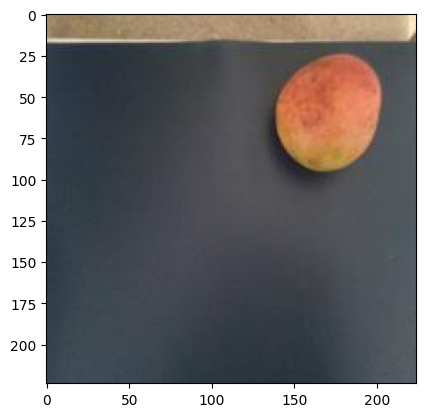

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.image as mpimg

def classify_image(image_path, model):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_indices = 'Rotten' if predictions[0][0] > 0.5 else 'Healthy'
    print(predicted_indices)

# Example usage
image_path = '/content/Fruit And Vegetable Diseases Dataset/test/Healthy/111.jpg'  # Change this to the path of your image
classify_image(image_path, model)
plt.imshow(mpimg.imread(image_path))

# **K-Fold version**

In [15]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [49]:
batch_size = 32
img_height = 180
img_width = 180

# K-Fold cross-validation settings
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

metrics_list = []
model_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(range(len(train_generator)))):
        print(f"Training fold {fold+1}/{k}")

        # Recreate the training and validation generators for each fold
        train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='binary',
            subset='training',  # Training subset
            shuffle=True
        )

        validation_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='binary',
            subset='validation',  # Validation subset
            shuffle=False
        )

        # Define the model architecture
        model_k = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
            layers.MaxPooling2D(pool_size=(2, 2)),

            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),

            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),

            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),

            layers.Flatten(),
            layers.Dense(512, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ])

        # Compile the model
        model_k.compile(optimizer='adam',
                        loss='binary_crossentropy', 
                        metrics=['accuracy'])

        # Define a unique filename for saving the best model of this fold
        checkpoint_filepath = f'best_model_fold_{fold+1}.h5'

        # Define the ModelCheckpoint callback to save the best model
        checkpoint_callback = ModelCheckpoint(
            filepath=checkpoint_filepath,  # Filepath where the best model will be saved
            save_best_only=True,  # Save only the model with the best validation accuracy
            monitor='val_accuracy',  # You can also monitor 'val_loss'
            mode='max',  # Set to 'min' if you monitor 'val_loss'
            verbose=1  # Show message when a model is saved
        )

        # Fit the model with the checkpoint callback
        history_k = model_k.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=10,  # Adjust based on your dataset
            callbacks=[checkpoint_callback],  # Include the checkpoint callback
            verbose=2
        )

        # Append the model and metrics for later analysis
        model_list.append(model_k)
        metrics_list.append(history_k.history)

Training fold 1/5
Found 17623 images belonging to 2 classes.
Found 4404 images belonging to 2 classes.
Epoch 1/10


d:\Anaconda\envs\ML\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Epoch 1: val_accuracy improved from -inf to 0.68846, saving model to best_model_fold_1.h5
551/551 - 299s - loss: 0.5751 - accuracy: 0.6854 - val_loss: 0.5635 - val_accuracy: 0.6885 - 299s/epoch - 543ms/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.68846 to 0.75954, saving model to best_model_fold_1.h5
551/551 - 295s - loss: 0.4251 - accuracy: 0.8000 - val_loss: 0.5147 - val_accuracy: 0.7595 - 295s/epoch - 535ms/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.75954
551/551 - 292s - loss: 0.3838 - accuracy: 0.8235 - val_loss: 0.5678 - val_accuracy: 0.6830 - 292s/epoch - 530ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.75954
551/551 - 292s - loss: 0.3447 - accuracy: 0.8493 - val_loss: 0.4994 - val_accuracy: 0.7554 - 292s/epoch - 530ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.75954
551/551 - 292s - loss: 0.3253 - accuracy: 0.8580 - val_loss: 0.4803 - val_accuracy: 0.7568 - 292s/epoch - 531ms/step
Epoch 6/10

Epoch 6: val_accur

In [23]:
model_k = tf.keras.models.load_model('D:\Working\AiProj\\best_model_fold_4.h5')

In [25]:
eval_result = model_k.evaluate(test_generator)
print(f"Training Loss: {eval_result[0]}, Training Accuracy: {eval_result[1]}")

 50/177 [=======>......................] - ETA: 30s - loss: 0.3373 - accuracy: 0.8700

d:\Anaconda\envs\ML\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


177/177 [==============================] - 33s 188ms/step - loss: 0.2163 - accuracy: 0.9104
Training Loss: 0.21634159982204437, Training Accuracy: 0.9104424715042114


In [24]:
evaluate(model_k,class_indices,test_generator)

 50/177 [=======>......................] - ETA: 52s

d:\Anaconda\envs\ML\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


177/177 [==============================] - 67s 379ms/step
              precision    recall  f1-score   support

     Healthy       0.90      0.91      0.90      2645
      Rotten       0.92      0.91      0.92      3005

    accuracy                           0.91      5650
   macro avg       0.91      0.91      0.91      5650
weighted avg       0.91      0.91      0.91      5650



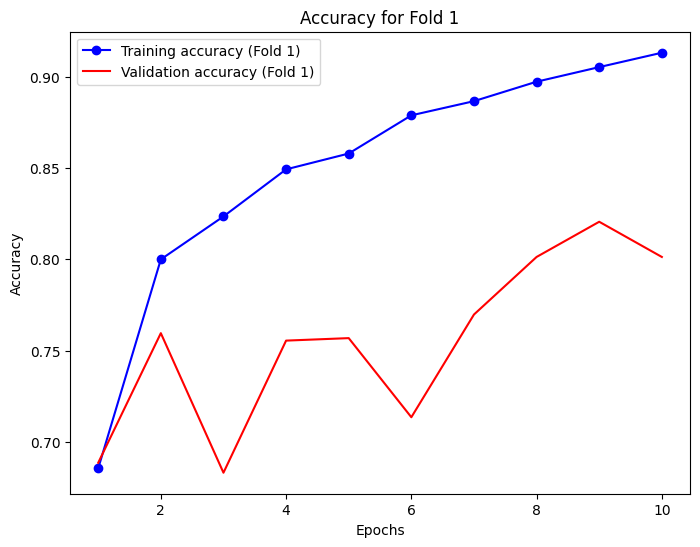

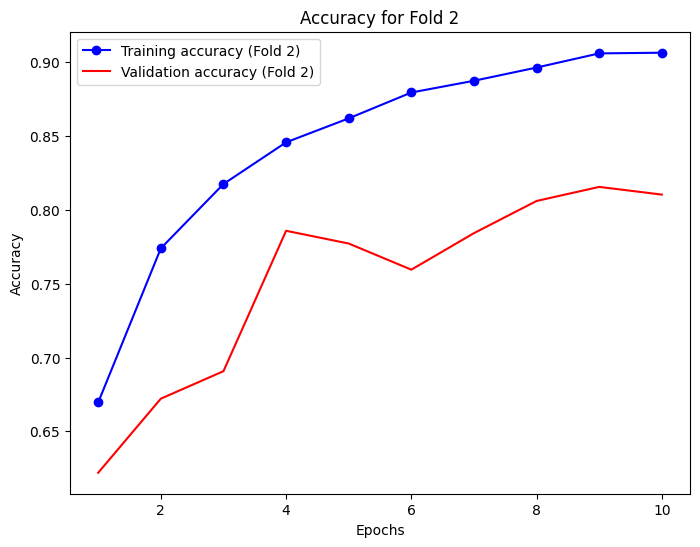

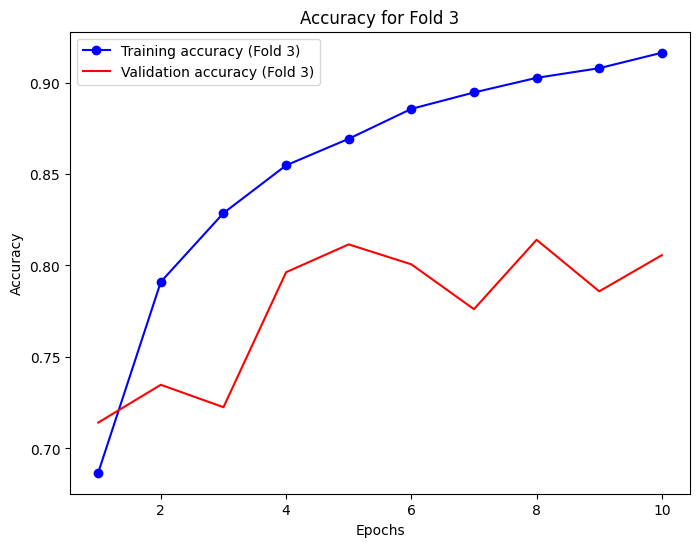

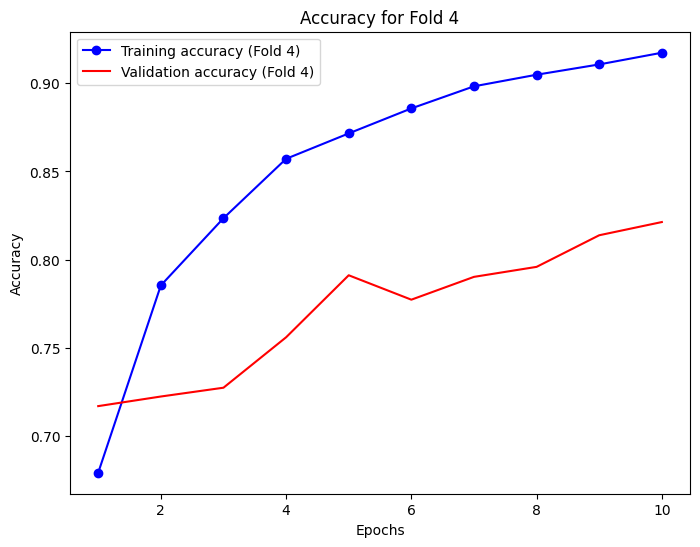

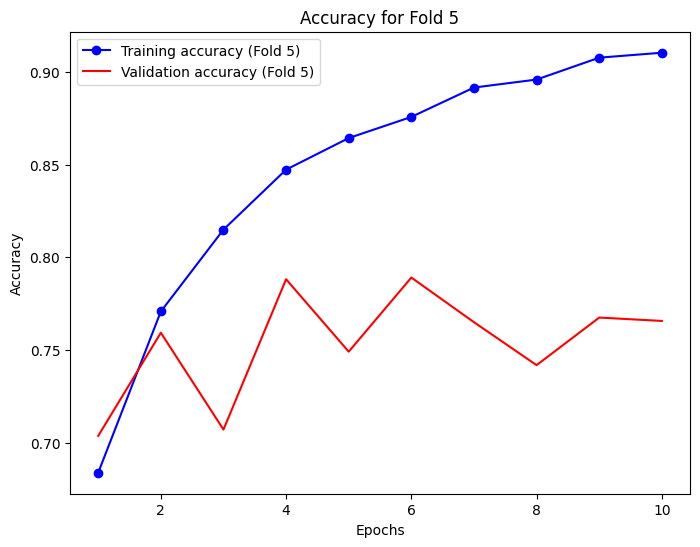

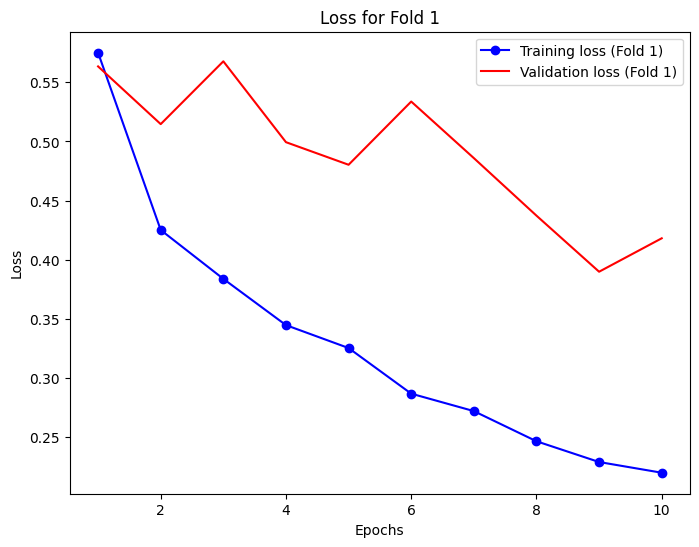

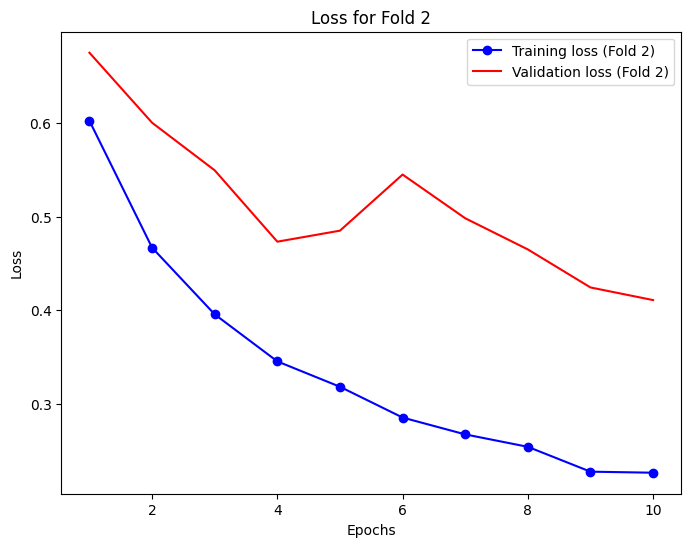

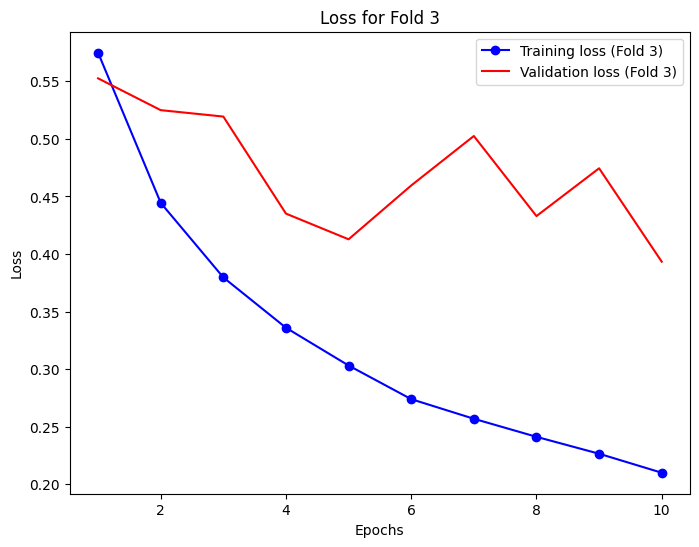

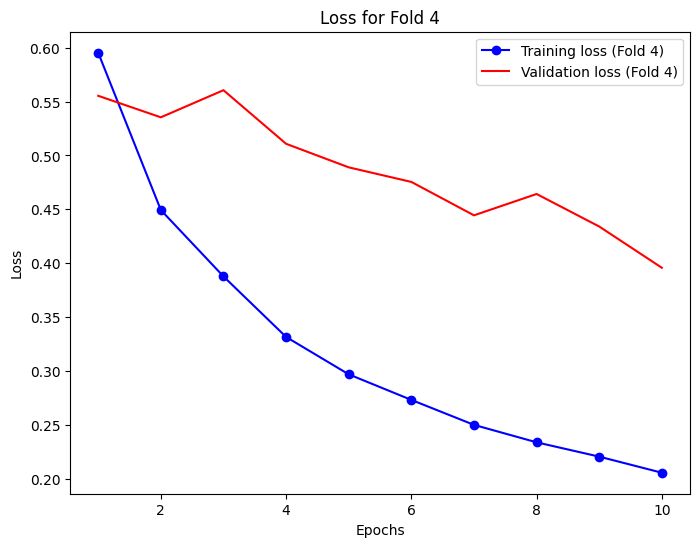

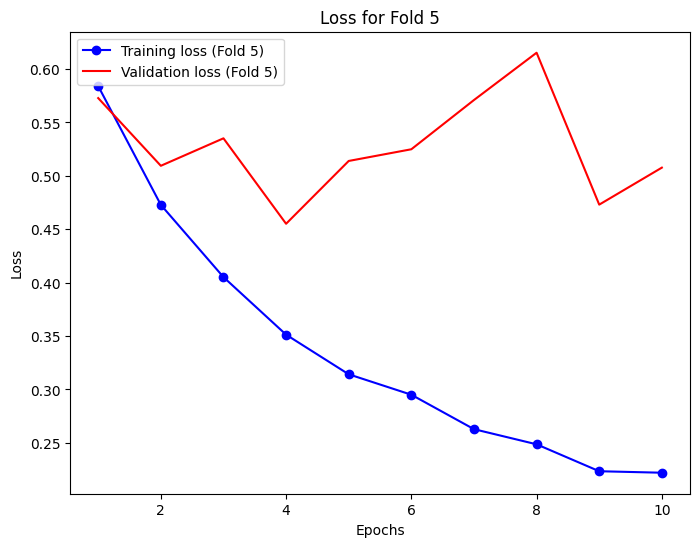

In [51]:
def plot_metrics(metrics_list, metric_name='accuracy'):
    # Iterate over all folds
    for i, metrics in enumerate(metrics_list):
        # Get the metric values for the current fold
        acc = metrics.get(f'{metric_name}')  # Training accuracy
        val_acc = metrics.get(f'val_{metric_name}')  # Validation accuracy

        # Plot accuracy
        epochs = range(1, len(acc) + 1)
        plt.figure(figsize=(8, 6))
        plt.plot(epochs, acc, 'bo-', label=f'Training {metric_name} (Fold {i+1})')
        plt.plot(epochs, val_acc, 'r-', label=f'Validation {metric_name} (Fold {i+1})')
        plt.title(f'{metric_name.capitalize()} for Fold {i+1}')
        plt.xlabel('Epochs')
        plt.ylabel(metric_name.capitalize())
        plt.legend()
        plt.show()

# Call the function for accuracy
plot_metrics(metrics_list, metric_name='accuracy')

# Call the function for loss
plot_metrics(metrics_list, metric_name='loss')

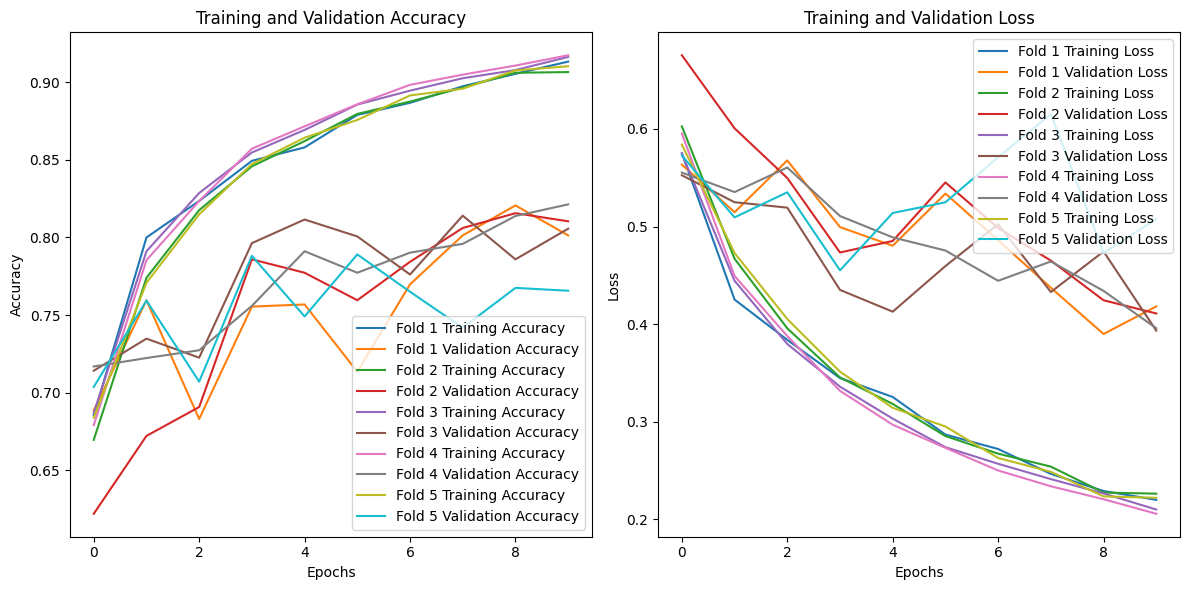

In [52]:
def plot_metrics(metrics_list):
    fold = 1
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy for each fold
    for metrics in metrics_list:
        plt.subplot(1, 2, 1)  # Subplot for accuracy
        plt.plot(metrics['accuracy'], label=f'Fold {fold} Training Accuracy')
        plt.plot(metrics['val_accuracy'], label=f'Fold {fold} Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        # Plot training and validation loss for each fold
        plt.subplot(1, 2, 2)  # Subplot for loss
        plt.plot(metrics['loss'], label=f'Fold {fold} Training Loss')
        plt.plot(metrics['val_loss'], label=f'Fold {fold} Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        fold += 1

    plt.tight_layout()
    plt.show()

# Call the function to visualize metrics
plot_metrics(metrics_list)

# **Testing Section**
Evaluate to Compair 2 model with the same architecture but one is a model that convert to tflite to use with mobile application

the dataset that use to test is contains 23 fresh and 25 rotten  fruit/vetgetable

In [29]:
test_dataset = "D:\Working\AiProj\\test_img-20241019T104733Z-001\\test_img"

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dataset,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

Found 48 images belonging to 2 classes.


In [31]:
import tensorflow as tf
model = tf.keras.models.load_model("D:\Working\AiProj\\best_model_fold_4.h5")

In [32]:
evaluate(model,class_indices,test_generator)

2/2 [==============================] - 1s 690ms/step
              precision    recall  f1-score   support

     Healthy       0.80      0.70      0.74        23
      Rotten       0.75      0.84      0.79        25

    accuracy                           0.77        48
   macro avg       0.78      0.77      0.77        48
weighted avg       0.77      0.77      0.77        48



In [33]:
from sklearn.metrics import classification_report
tflite_model_path = "D:\Working\AiProj\model.tflite"  # .tflite model
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [34]:
def predict_tflite(interpreter, image):
    input_shape = input_details[0]['shape']  # Typically [1, height, width, 3]
    image = np.expand_dims(image, axis=0)  # Reshape to [1, height, width, 3]
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    return output

In [35]:
y_true = []
y_pred = []

for i in range(len(test_generator)):
    # Get a batch of images and labels
    batch_images, batch_labels = test_generator[i]

    # Run inference on each image individually
    for image, label in zip(batch_images, batch_labels):
        prediction = predict_tflite(interpreter, image)

        # Collect the ground truth and predictions
        y_true.append(label)
        y_pred.append(prediction)

# Post-process the predictions (apply threshold for binary classification)
y_pred = np.array(y_pred).squeeze()
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming binary classification

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_indices))



Classification Report:

              precision    recall  f1-score   support

     Healthy       0.80      0.70      0.74        23
      Rotten       0.75      0.84      0.79        25

    accuracy                           0.77        48
   macro avg       0.78      0.77      0.77        48
weighted avg       0.77      0.77      0.77        48

